In [178]:
import os
os.chdir(r"C:\Users\Collin\Documents\collins documents\Regis Homework\Machine Learning wk 1\assign_wk1\assign_wk1")
#Setting directory

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#Importing necessary packages

In [180]:
df =  pd.read_csv('Heart_Data.csv')
#importing Heart Data from last week

In [181]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
0,2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
1,6,62.0,0.0,4.0,140.0,2.0,160.0,0.0,3.0,3.0
2,7,57.0,0.0,4.0,120.0,0.0,163.0,1.0,3.0,0.0
3,8,63.0,1.0,4.0,130.0,2.0,147.0,0.0,7.0,2.0
4,9,53.0,1.0,4.0,140.0,2.0,155.0,1.0,7.0,1.0


In [182]:
df = df.drop('Unnamed: 0', axis=1)

In [183]:
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
0,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
1,62.0,0.0,4.0,140.0,2.0,160.0,0.0,3.0,3.0
2,57.0,0.0,4.0,120.0,0.0,163.0,1.0,3.0,0.0
3,63.0,1.0,4.0,130.0,2.0,147.0,0.0,7.0,2.0
4,53.0,1.0,4.0,140.0,2.0,155.0,1.0,7.0,1.0


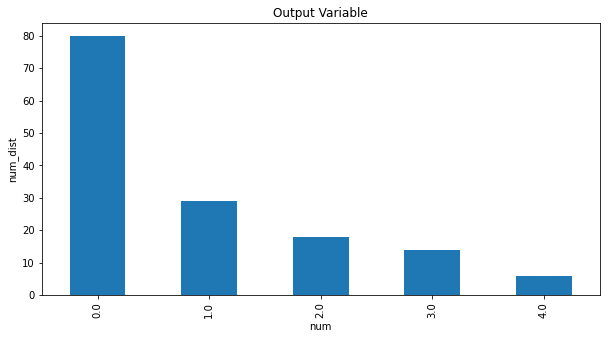

In [184]:
df.num.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Output Variable")
plt.ylabel('num_dist')
plt.xlabel('num');
#Checking distribution of values for dependent variable

In [185]:
df.describe()
#Looking at different scales for different variables

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,54.891156,0.646259,3.333333,129.013605,1.034014,151.224490,0.319728,4.841351,0.891156
std,8.278648,0.479765,0.743311,15.150834,1.002838,10.631947,0.467965,1.957429,1.188583
min,35.000000,0.000000,2.000000,94.000000,0.000000,129.000000,0.000000,3.000000,0.000000
25%,49.000000,0.000000,3.000000,120.000000,0.000000,143.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,2.000000,152.000000,0.000000,3.000000,0.000000
75%,60.500000,1.000000,4.000000,140.000000,2.000000,160.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,2.000000,168.000000,1.000000,7.000000,4.000000


In [186]:
dfy = df['num']

In [187]:
dfx = df.drop('num', axis=1)

In [188]:
column_list = list(dfx)

In [189]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(dfx)
#Scaling Independent variables

In [190]:
N_scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
#Normalizing Data

In [191]:
df1 = pd.DataFrame(df1, columns = column_list)

In [192]:
df1.head()

,age,sex,cp,trestbps,restecg,thalach,exang,thal
0,0.761905,1.0,1.0,0.342105,1.0,0.000000,1.0,1.0
1,0.642857,0.0,1.0,0.605263,1.0,0.794872,0.0,0.0
2,0.523810,0.0,1.0,0.342105,0.0,0.871795,1.0,0.0
3,0.666667,1.0,1.0,0.473684,1.0,0.461538,0.0,1.0
4,0.428571,1.0,1.0,0.605263,1.0,0.666667,1.0,1.0


In [193]:
df1 = df1.join(dfy)

In [194]:
df1.head()

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
0,0.761905,1.0,1.0,0.342105,1.0,0.000000,1.0,1.0,1.0
1,0.642857,0.0,1.0,0.605263,1.0,0.794872,0.0,0.0,3.0
2,0.523810,0.0,1.0,0.342105,0.0,0.871795,1.0,0.0,0.0
3,0.666667,1.0,1.0,0.473684,1.0,0.461538,0.0,1.0,2.0
4,0.428571,1.0,1.0,0.605263,1.0,0.666667,1.0,1.0,1.0


In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
clf = KNeighborsClassifier(n_neighbors=1)
#Importing packages for KNN

In [196]:
X = df1[df1.columns[0:8]]
y = df1['num']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Splitting data for training and test sets

In [198]:
clf.fit(X_train, y_train)
#Fitting KNN 1 neighbor to training set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [199]:
from sklearn.metrics import confusion_matrix

In [200]:
y_pred=clf.predict(X_test)

In [201]:
conmat = confusion_matrix(y_test, y_pred)
print(conmat)
#Checking 

[[12  1  2  2  1]
 [ 3  2  0  2  1]
 [ 1  4  0  1  0]
 [ 1  2  0  1  0]
 [ 0  1  0  0  0]]


In [206]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80        21
         1.0       0.22      0.33      0.27         6
         2.0       0.50      0.29      0.36         7
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         2

    accuracy                           0.54        37
   macro avg       0.31      0.28      0.29        37
weighted avg       0.61      0.54      0.57        37



C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [208]:
accuracy_score(y_test,y_pred)
# 1 neighbor accuracy is only 40%

0.40540540540540543

In [168]:
clf5 = KNeighborsClassifier(n_neighbors=5)
clf5.fit(X_train, y_train)
y5_pred = clf1.predict(X_test)
conmat = confusion_matrix(y_test, y5_pred)
print(conmat)

[[21  0  0  0  0]
 [ 3  3  0  0  0]
 [ 1  6  0  0  0]
 [ 0  1  0  0  0]
 [ 1  1  0  0  0]]


In [169]:
print(classification_report(y_test, y5_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        21
         1.0       0.27      0.50      0.35         6
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         2

    accuracy                           0.65        37
   macro avg       0.22      0.30      0.25        37
weighted avg       0.50      0.65      0.56        37



C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [207]:
accuracy_score(y_test, y5_pred)


0.43243243243243246

In [170]:
clf10 = KNeighborsClassifier(n_neighbors=10)
clf10.fit(X_train, y_train)
y10_pred = clf1.predict(X_test)
conmat = confusion_matrix(y_test, y10_pred)
print(conmat)

[[21  0  0  0  0]
 [ 3  3  0  0  0]
 [ 1  6  0  0  0]
 [ 0  1  0  0  0]
 [ 1  1  0  0  0]]


In [171]:
print(classification_report(y_test, y10_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        21
         1.0       0.27      0.50      0.35         6
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         2

    accuracy                           0.65        37
   macro avg       0.22      0.30      0.25        37
weighted avg       0.50      0.65      0.56        37



C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [209]:
accuracy_score(y_test, y10_pred)

0.43243243243243246

In [172]:
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(X_train, y_train)
y3_pred = clf1.predict(X_test)
conmat = confusion_matrix(y_test, y3_pred)
print(conmat)

[[21  0  0  0  0]
 [ 3  3  0  0  0]
 [ 1  6  0  0  0]
 [ 0  1  0  0  0]
 [ 1  1  0  0  0]]


In [174]:
print(classification_report(y_test, y3_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        21
         1.0       0.27      0.50      0.35         6
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         2

    accuracy                           0.65        37
   macro avg       0.22      0.30      0.25        37
weighted avg       0.50      0.65      0.56        37



In [211]:
accuracy_score(y_test, y3_pred)

0.43243243243243246

In [175]:
clf2 = KNeighborsClassifier(n_neighbors=2)
clf2.fit(X_train, y_train)
y2_pred = clf2.predict(X_test)
conmat = confusion_matrix(y_test, y2_pred)
print(conmat)

[[20  1  0  0  0]
 [ 4  1  0  1  0]
 [ 3  4  0  0  0]
 [ 0  1  0  0  0]
 [ 0  1  1  0  0]]


In [176]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83        21
         1.0       0.12      0.17      0.14         6
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         2

    accuracy                           0.57        37
   macro avg       0.17      0.22      0.20        37
weighted avg       0.44      0.57      0.50        37



C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [212]:
accuracy_score(y_test, y2_pred)

0.40540540540540543

Use different values for K, what is the optimal value of K from your experiments?
The optimal K so far is 5 neighbors which increases the accuracy by 3% over 1 neighbor.  In order to improve accuracy I'm going to hypertune parameters

In [223]:
#List Hyperparameters to tune
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
KNN = GridSearchCV(clf, hyperparameters, cv=10)
best_model = KNN.fit(X_train,y_train)
#https://medium.datadriveninvestor.com/increase-10-accuracy-with-re-scaling-features-in-k-nearest-neighbors-python-code-677d28032a45


C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [224]:
best_y = best_model.predict(X_test)

In [225]:
conmat = confusion_matrix(y_test, best_y)
print(conmat)

[[16  2  0  0  0]
 [ 6  2  0  0  0]
 [ 1  5  0  0  0]
 [ 1  3  0  0  0]
 [ 0  1  0  0  0]]


In [226]:
print(classification_report(y_test, best_y))

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76        18
         1.0       0.15      0.25      0.19         8
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         1

    accuracy                           0.49        37
   macro avg       0.16      0.23      0.19        37
weighted avg       0.36      0.49      0.41        37



C:\Users\Collin\OneDrive\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [227]:
accuracy_score(y_test, best_y)

0.4864864864864865

#After hypertuning parameters accuracy was increased by 6%